In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

2023-11-02 11:35:47.141796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 11:35:47.141819: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 11:35:47.142785: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 11:35:47.234080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 11:35:48.245393: W tensorflow/compiler/

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

1.2 압축을 풀고 폴더를 관찰했더니

In [3]:
!ls "../EDA/data/deep_running_data/archive .fruit/train/train"

'Apple Braeburn'       Clementine       Orange		 Pomegranate
'Apple Granny Smith'   Corn	        Papaya		'Potato Red'
 Apricot	      'Cucumber Ripe'  'Passion Fruit'	 Raspberry
 Avocado	      'Grape Blue'      Peach		 Strawberry
 Banana		       Kiwi	        Pear		 Tomato
 Blueberry	       Lemon	       'Pepper Green'	 Watermelon
'Cactus fruit'	       Limes	       'Pepper Red'
 Cantaloupe	       Mango	        Pineapple
 Cherry		      'Onion White'     Plum


1.3 이렇게 생겼다

In [4]:
import glob
folder_list = glob.glob('../EDA/data/deep_running_data/archive .fruit/train/train/*')
folder_list

['../EDA/data/deep_running_data/archive .fruit/train/train/Apricot',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Potato Red',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Pear',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Pomegranate',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Papaya',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Clementine',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Cucumber Ripe',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Cactus fruit',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Avocado',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Strawberry',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Onion White',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Passion Fruit',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Mango',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Watermelon',
 '.

1.4 라벨은 33개

In [5]:
len(folder_list)

33

1.5 모든 데이터 경로를 한 번에 모아두자

In [6]:
file_list = []
for each in folder_list:
    file_list.extend(glob.glob(each +'/*'))

In [7]:
file_list

['../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_183.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_86.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_433.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_162.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_482.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_302.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_10.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_101.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_411.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_309.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/Apricot_316.jpg',
 '../EDA/data/deep_running_data/archive .fruit/train/train/Apricot/

1.6 라벨 이름만 따로~

In [8]:
label_name = [each.split('/')[-2] for each in file_list]
label_name

['Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Ap

1.7 혹시나 하고 갯수 확인하고

In [9]:
len(file_list), len(label_name)

(16854, 16854)

1.8 데이터 프레임으로~

In [10]:
import pandas as pd

file_list_pd = pd.DataFrame({'path': file_list, 'label': label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854 entries, 0 to 16853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    16854 non-null  object
 1   label   16854 non-null  object
dtypes: object(2)
memory usage: 263.5+ KB


1.9 라벨별 현황

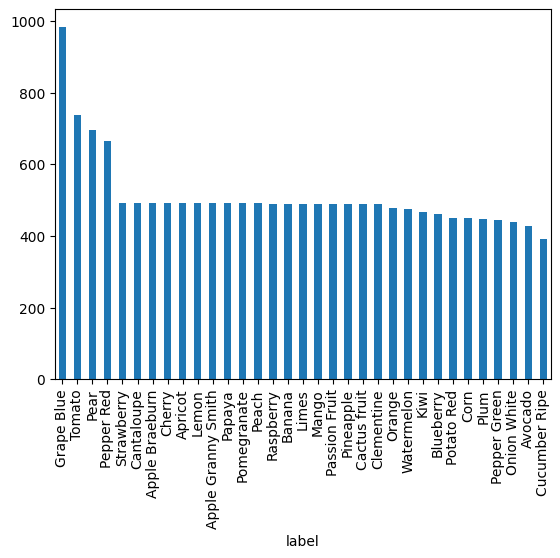

In [11]:
file_list_pd['label'].value_counts().plot.bar();

1.10 데이터를 확인하기 위해 한 라벨에서 한 데이터만 뽑자

In [12]:
random_sample = file_list_pd.groupby('label', group_keys=False).apply(lambda x : x.sample(1))

random_sample.head()

,path,label
12318,../EDA/data/deep_running_data/archive .fruit/t...,Apple Braeburn
12991,../EDA/data/deep_running_data/archive .fruit/t...,Apple Granny Smith
471,../EDA/data/deep_running_data/archive .fruit/t...,Apricot
4198,../EDA/data/deep_running_data/archive .fruit/t...,Avocado
11271,../EDA/data/deep_running_data/archive .fruit/t...,Banana


1.11 그걸 그리는 함수

In [13]:
import matplotlib.pyplot as plt

def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize= (24,20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt)
        cnt += 1
        image = plt.imread(row['path'])
        plt.imshow(image)
        plt.axis("off")
        plt.title(row['label'])
    plt.tight_layout()
    plt.show()

1.12 요딴 아이들

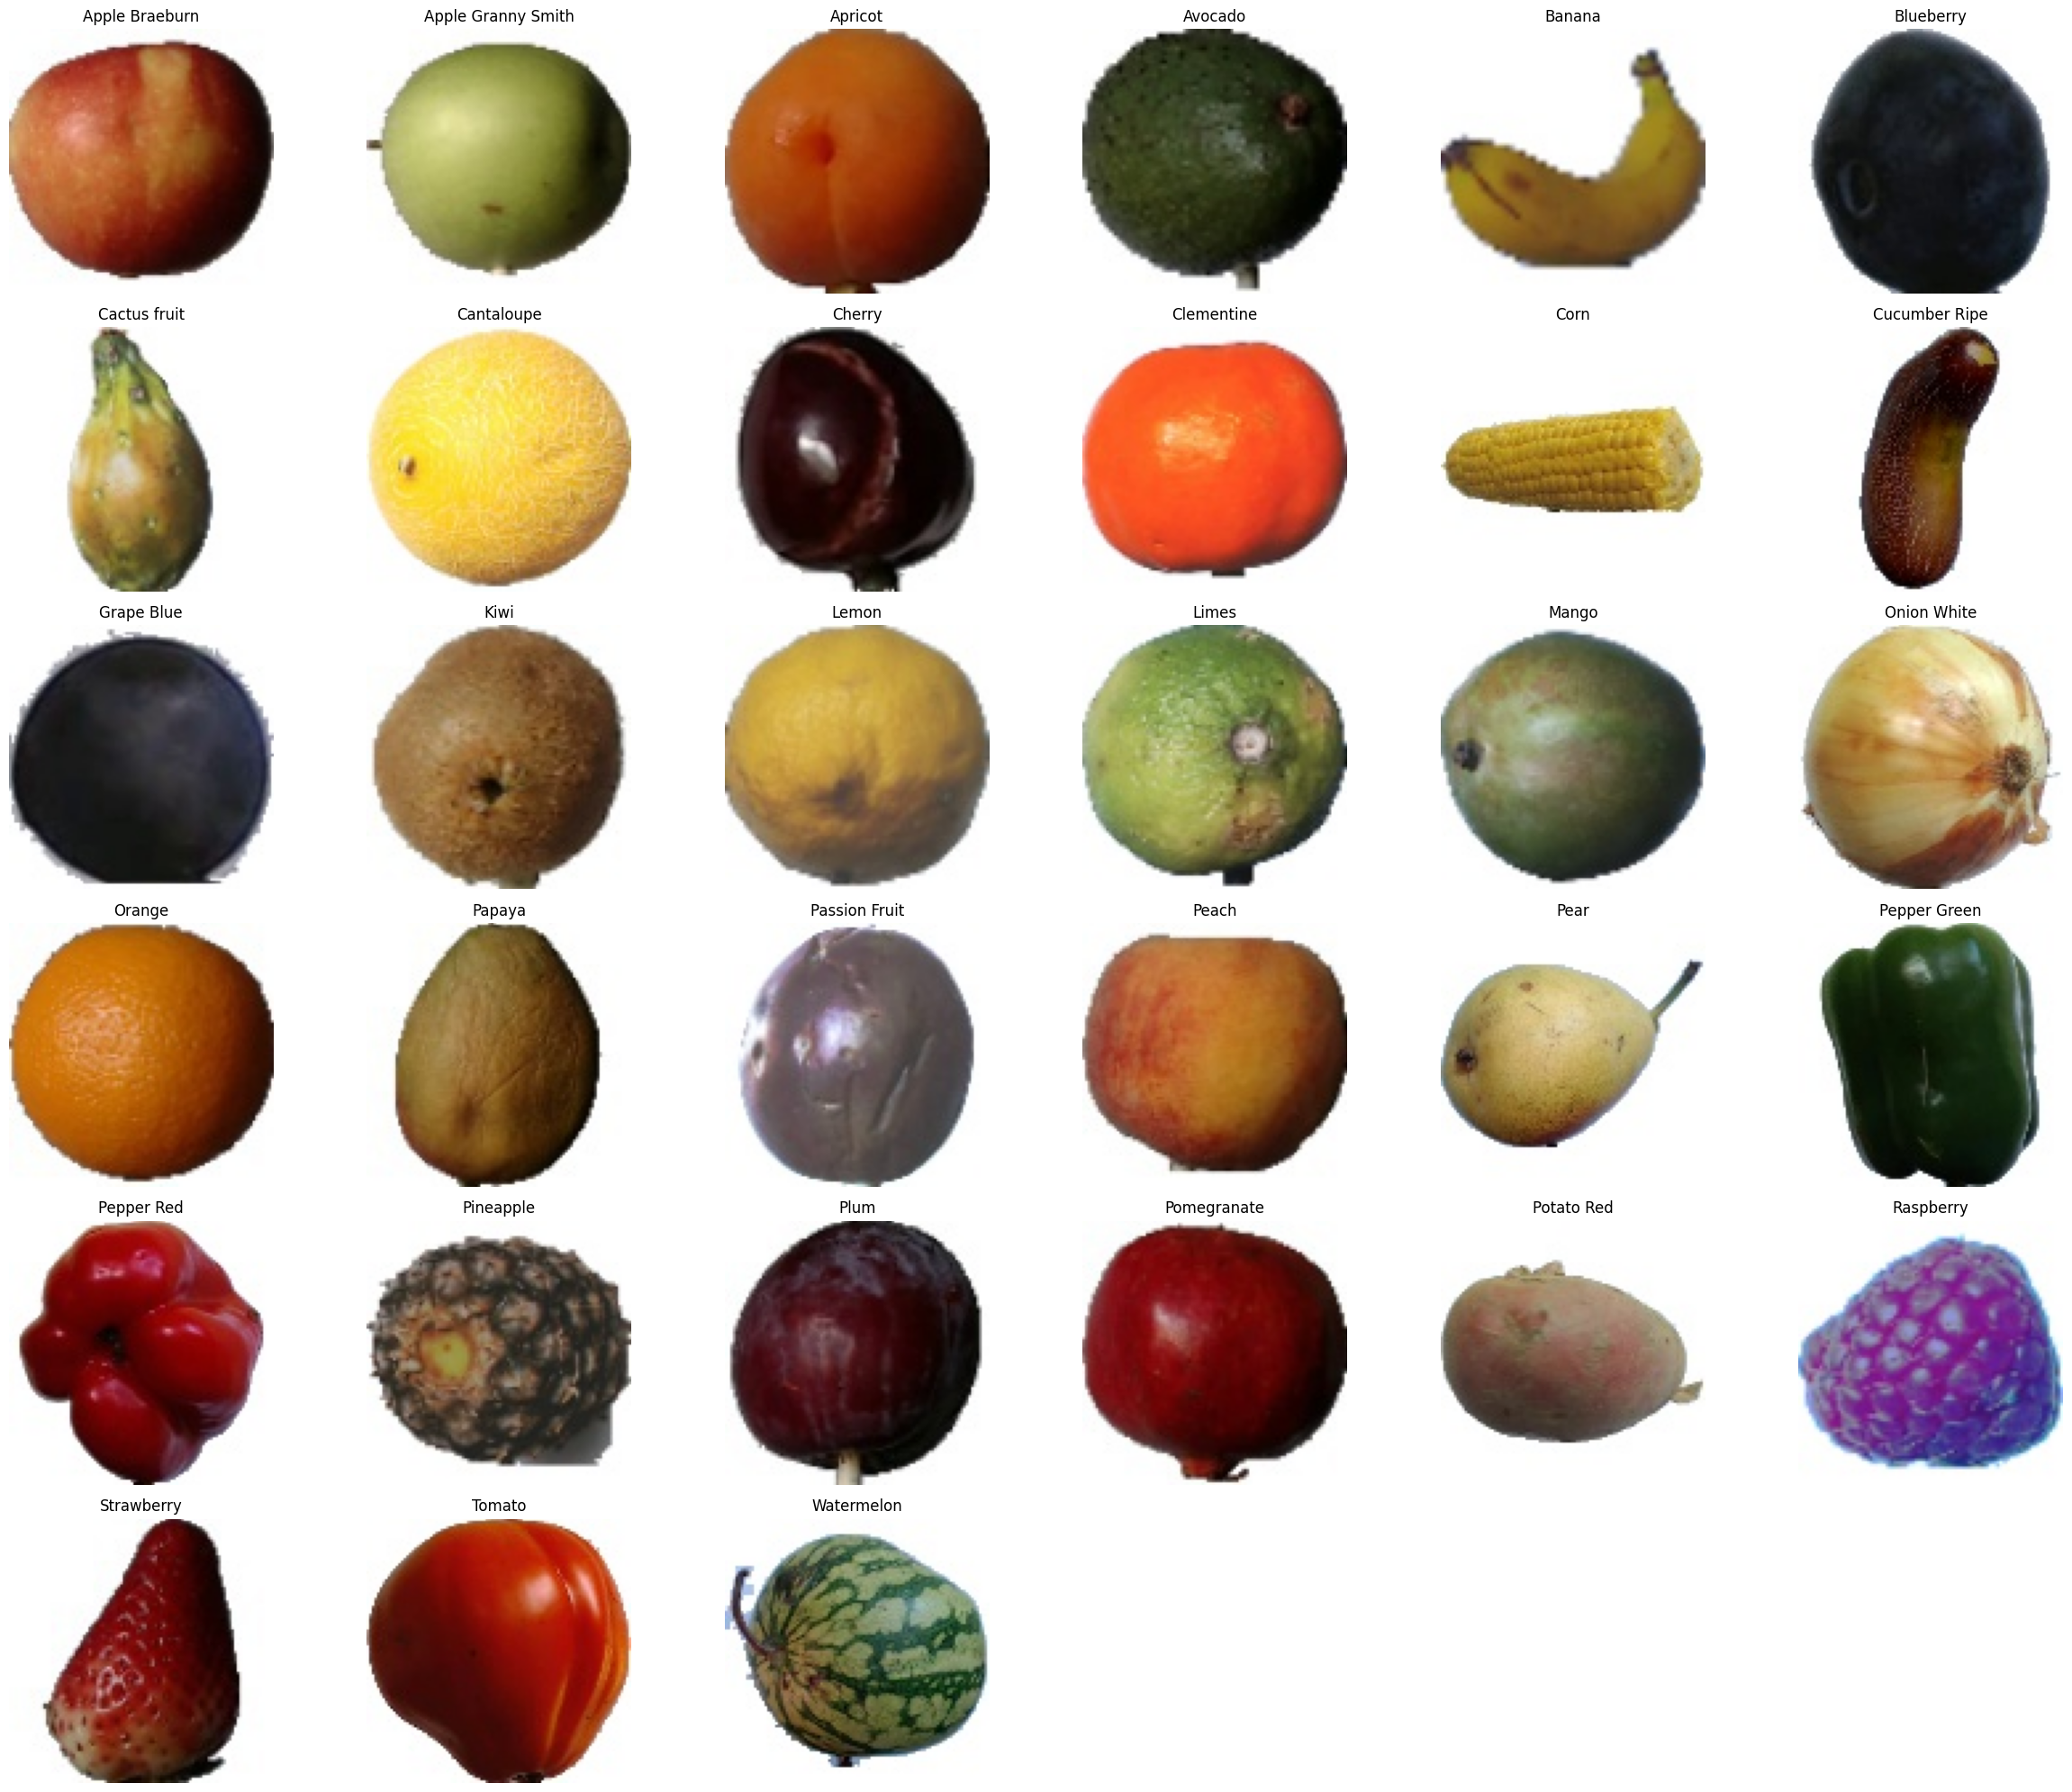

In [14]:
draw_sample_pic_from_file_list(random_sample)

In [15]:
#1.13 train과 test로 데이터를 나누고

In [16]:
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                               test_size = 0.1,
                                               stratify= file_list_pd["label"],
                                               random_state = 13)

1.14 train과 validation으로 데이터를 나누고

In [17]:
train_data, val_data = train_test_split(train_data_condi, test_size = 0.2, stratify = train_data_condi["label"],random_state=13)

1.15 훈련용 데이터 현황

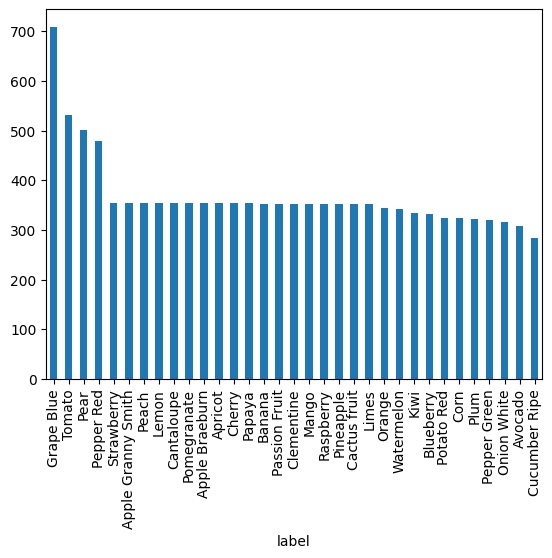

In [18]:
train_data['label'].value_counts().plot.bar();

1.17 훈련용 데이터 현황

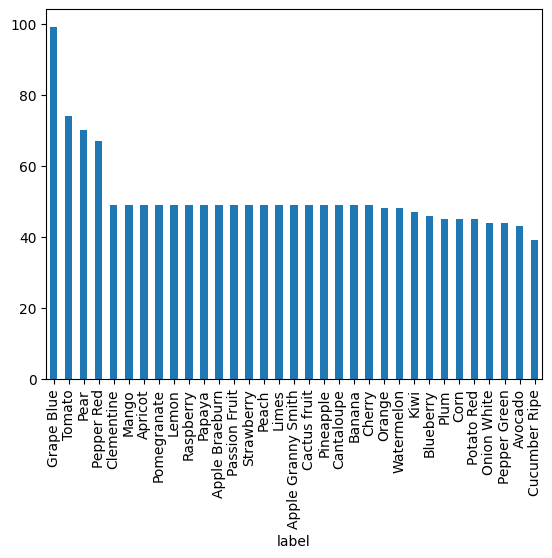

In [19]:
test_data["label"].value_counts().plot.bar();

1.18 훈련용 데이터

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    width_shift_range =0.1)

train_generator = train_data_gen.flow_from_dataframe(dataframe = train_data,
                                                     target_size =(150, 150),
                                                     class_mode = 'categorical',
                                                     x_col = "path",
                                                     y_col = "label")

Found 12134 validated image filenames belonging to 33 classes.


1.19 검증용 데이터

In [22]:
val_data_gen = ImageDataGenerator(rescale=1./255)

val_generator = val_data_gen.flow_from_dataframe(
    dataframe = val_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = "categorical",
    target_size = (150, 150),
    seed = 13,
    shuffle = False
)

Found 3034 validated image filenames belonging to 33 classes.


1.20 테스트용 데이터

In [23]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_dataframe(
    dataframe = test_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = "categorical",
    target_size = (150, 150),
    seed = 13,
    shuffle = False
)

Found 1686 validated image filenames belonging to 33 classes.


1.21 모델

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(150, 150, 3),
                  padding = 'same'),
    layers.MaxPooling2D(pool_size =(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = 'relu',padding = 'same'), layers.MaxPooling2D(pool_size =(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size =(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(len(folder_list), activation ='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

2023-11-02 13:21:21.961990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 13:21:21.962283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 13:21:21.962499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1.22 컴파일~

In [29]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

1.23 훈련 시작~

In [30]:
hist = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5


2023-11-02 13:24:06.016837: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-02 13:24:07.665460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-02 13:24:10.592126: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564fedc65df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-02 13:24:10.592147: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-02 13:24:10.598662: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-02 13:24:10.685620: I ./tensorflow/compiler/jit/device_compiler.h:186] Comp

380/380 [==============================] - 48s 110ms/step - loss: 0.8443 - accuracy: 0.7467 - val_loss: 0.0481 - val_accuracy: 0.9898
Epoch 2/5
380/380 [==============================] - 41s 108ms/step - loss: 0.1085 - accuracy: 0.9652 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 3/5
380/380 [==============================] - 41s 108ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 4/5
380/380 [==============================] - 41s 108ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0100 - val_accuracy: 0.9964
Epoch 5/5
380/380 [==============================] - 42s 109ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0070 - val_accuracy: 0.9987


In [32]:
pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


1.24 훈련 결과를 알기 위해

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_learning_history(hist, targets, labels, axes_num):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))

    for i in range(4):
        sns.lineplot(x = range(len(hist.history[targets[i]])),
        y = hist.history[targets[i]], ax = ax[axes_num[i]], label = labels[i])

        ax[0].set_title("Loss"); ax[1].set_title("Accuracy")
        sns.despine();plt.show()

In [ ]:
targets = ["loss", "val_loss", "accuracy",  "val_accuracy"]
labels = ["Training Loss, "Validation Loss", "Training Accuracy","Validation Accuracy"]